In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pymsm.datasets import prep_covid_hosp_data
from pymsm.multi_state_competing_risks_model import MultiStateModel
from pymsm.statistics import (
    prob_visited_states,
    stats_total_time_at_states,
    get_path_frequencies,
    path_total_time_at_states
)
from pymsm.simulation import MultiStateSimulator

%load_ext autoreload
%autoreload 2

In [2]:
from pymsm.datasets import prep_covid_hosp_data, plot_covid_hosp
dataset, state_labels = prep_covid_hosp_data()
plot_covid_hosp(dataset, state_labels)

100%|█████████████████████████████████████████████████████████████████████████████| 2675/2675 [00:02<00:00, 985.59it/s]


In [26]:
print(dataset[0])

In [3]:
# Some definitions
covariate_cols = ["is_male", "age", "was_severe"]
terminal_states = [4]
state_labels_short = {0: "C", 1: "R", 2: "M", 3: "S", 4: "D"}
print(state_labels)


{1: 'Discharged\\Recovered', 2: 'Mild or Moderate', 3: 'Severe', 4: 'Deceased'}


In [4]:
dataset[567].print_path()


Sample id: 577
States: [2 3 4]
Transition times: [ 6 31]
Covariates:
is_male        1.0
age           72.5
was_severe     0.0
Name: 567, dtype: float64


In [5]:
path_freqs = get_path_frequencies(dataset, state_labels_short)
print(path_freqs)


M->R                               1906
M                                   202
M->S                                 76
S->D                                 74
M->S->D                              59
M->S->M->R                           46
M->D                                 44
M->R->M->R                           42
S                                    42
M->R->M                              36
M->S->M                              35
S->M->R                              28
S->M                                 27
M->S->M->S                            8
S->R                                  6
S->M->S                               5
S->M->S->M->R                         3
S->M->D                               3
M->S->M->S->M                         3
M->S->M->S->M->R                      3
M->R->M->R->M->R                      3
M->S->R                               3
S->M->S->D                            2
M->S->M->D                            2
M->R->M->S                            2


In [6]:
def covid_update_covariates_function(
    covariates_entering_origin_state,
    origin_state=None,
    target_state=None,
    time_at_origin=None,
    abs_time_entry_to_target_state=None,
):
    covariates = covariates_entering_origin_state.copy()

    # update is_severe covariate
    if origin_state == 3:
        covariates['was_severe'] = 1

    # # update cum_hosp_tim covariate
    # if ((origin_state==2) & (origin_state==3)):
    #     covariates["cum_hosp_time"] += time_at_origin

    return covariates


In [7]:
multi_state_model = MultiStateModel(
    dataset=dataset,
    terminal_states=terminal_states,
    update_covariates_fn=covid_update_covariates_function,
    covariate_names=covariate_cols,
    state_labels=state_labels,
)
multi_state_model.fit()


Fitting Model at State: 2
>>> Fitting Transition to State: 1, n events: 2135


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


>>> Fitting Transition to State: 3, n events: 275


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


>>> Fitting Transition to State: 4, n events: 52
Fitting Model at State: 1
>>> Fitting Transition to State: 2, n events: 98


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


>>> Fitting Transition to State: 3, n events: 2
Fitting Model at State: 3
>>> Fitting Transition to State: 2, n events: 193
>>> Fitting Transition to State: 1, n events: 9


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:1123: ConvergenceWarning: Column is_male have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['target_state'].astype(bool)
>>> print(df.loc[events, 'is_male'].var())
>>> print(df.loc[~events, 'is_male'].var())

A very low variance means that the column is_male completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.war

>>> Fitting Transition to State: 4, n events: 135


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


In [8]:
multi_state_model.transition_table


target_state,Censored,Discharged\Recovered,Mild or Moderate,Severe,Deceased
origin_state,,,,,
Discharged\Recovered,2044,0,98,2,0
Mild or Moderate,309,2135,0,275,52
Severe,135,9,193,0,135


In [9]:
multi_state_model = MultiStateModel(
    dataset=dataset,
    terminal_states=terminal_states,
    update_covariates_fn=covid_update_covariates_function,
    covariate_names=covariate_cols,
    state_labels=state_labels,
    trim_transitions_threshold=10
)
multi_state_model.fit()


Fitting Model at State: 2
>>> Fitting Transition to State: 1, n events: 2135


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


>>> Fitting Transition to State: 3, n events: 275


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


>>> Fitting Transition to State: 4, n events: 52
Fitting Model at State: 1
>>> Fitting Transition to State: 2, n events: 98


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


Fitting Model at State: 3
>>> Fitting Transition to State: 2, n events: 193
>>> Fitting Transition to State: 4, n events: 135


C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
C:\Users\u242000\AppData\Roaming\Python\Python311\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


In [11]:
multi_state_model.transition_table


target_state,Censored,Discharged\Recovered,Mild or Moderate,Severe,Deceased
origin_state,,,,,
Discharged\Recovered,2044,0,98,0,0
Mild or Moderate,309,2135,0,275,52
Severe,135,0,193,0,135


In [12]:
# Run MC for a sample single patient
mc_paths = multi_state_model.run_monte_carlo_simulation(
    sample_covariates=pd.Series({"is_male":0, "age":75, "was_severe":0}),
    origin_state=2,
    current_time=0,
    n_random_samples=100,
    max_transitions=10,
    print_paths=False,
    n_jobs=-1
)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.60it/s]


In [17]:
# Probability of visiting any of the states
for state, state_label in state_labels.items():
    if state == 0:
        continue
    print(
        f"Probabilty of ever being {state_label} = {prob_visited_states(mc_paths, states=[state])}"
    )


# Stats for times at states
dfs = []
for state, state_label in state_labels.items():
    if state == 0 or state in terminal_states:
        continue
    dfs.append(
        pd.DataFrame(
            data=stats_total_time_at_states(mc_paths, states=[state]),
            index=[state_label],
        )
    )
pd.concat(dfs).round(3).T


Probabilty of ever being Discharged\Recovered = 0.05
Probabilty of ever being Mild or Moderate = 1.0
Probabilty of ever being Severe = 0.28
Probabilty of ever being Deceased = 1.0


,Discharged\Recovered,Mild or Moderate,Severe
time_in_state_mean,2.200,3.780,0.580
time_in_state_std,10.882,2.047,1.423
time_in_state_median,0.000,3.000,0.000
time_in_state_min,0.000,1.000,0.000
time_in_state_max,72.000,12.000,8.000
time_in_state_quantile_0.1,0.000,2.000,0.000
time_in_state_quantile_0.25,0.000,2.000,0.000
time_in_state_quantile_0.75,0.000,4.250,0.000
time_in_state_quantile_0.9,0.000,7.000,2.000


In [18]:
path_freqs = get_path_frequencies(mc_paths, state_labels)
path_freqs.head(10)


Mild or Moderate->Deceased                                             67
Mild or Moderate->Severe->Deceased                                     28
Mild or Moderate->Discharged\\Recovered->Mild or Moderate->Deceased     5
dtype: int64

In [19]:
path_freqs = get_path_frequencies(mc_paths, state_labels)
path_freqs.head(10)


Mild or Moderate->Deceased                                             67
Mild or Moderate->Severe->Deceased                                     28
Mild or Moderate->Discharged\\Recovered->Mild or Moderate->Deceased     5
dtype: int64

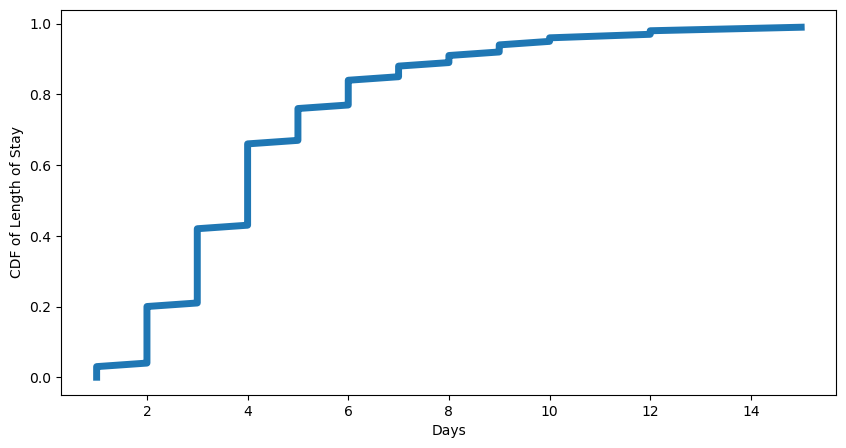

In [20]:
los = np.array([path_total_time_at_states(path, states = [2,3]) for path in mc_paths])

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(np.sort(los), np.linspace(0, 1, len(los), endpoint=False), lw=5)
# ax.set_xlim(0,20)
ax.set_ylabel('CDF of Length of Stay')
ax.set_xlabel('Days');


In [21]:
# Run MC for a sample single patient
mc_paths_severe = multi_state_model.run_monte_carlo_simulation(
    sample_covariates=pd.Series({"is_male":0, "age":75, "was_severe": 1}),
    origin_state=3,
    current_time=2,
    n_random_samples=100,
    max_transitions=10,
    print_paths=False,
    n_jobs=-1
)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.64it/s]


In [22]:
# Probability of visiting any of the states
for state, state_label in state_labels.items():
    if state == 0:
        continue
    print(
        f"Probabilty of ever being {state_label} = {prob_visited_states(mc_paths_severe, states=[state])}"
    )


# Stats for times at states
dfs = []
for state, state_label in state_labels.items():
    if state == 0 or state in terminal_states:
        continue
    dfs.append(
        pd.DataFrame(
            data=stats_total_time_at_states(mc_paths_severe, states=[state]),
            index=[state_label],
        )
    )
pd.concat(dfs).round(3).T


Probabilty of ever being Discharged\Recovered = 0.0
Probabilty of ever being Mild or Moderate = 0.04
Probabilty of ever being Severe = 1.0
Probabilty of ever being Deceased = 1.0


,Discharged\Recovered,Mild or Moderate,Severe
time_in_state_mean,0.0,0.060,6.210
time_in_state_std,0.0,0.341,6.962
time_in_state_median,0.0,0.000,4.000
time_in_state_min,0.0,0.000,0.000
time_in_state_max,0.0,3.000,35.000
time_in_state_quantile_0.1,0.0,0.000,0.000
time_in_state_quantile_0.25,0.0,0.000,1.000
time_in_state_quantile_0.75,0.0,0.000,7.250
time_in_state_quantile_0.9,0.0,0.000,15.400


In [23]:
from pymsm.simulation import extract_competing_risks_models_list_from_msm

competing_risks_models_list = extract_competing_risks_models_list_from_msm(
    multi_state_model, verbose=True
)

# Configure the simulator
mssim = MultiStateSimulator(
    competing_risks_models_list,
    terminal_states=[5, 6],
    update_covariates_fn=covid_update_covariates_function,
    covariate_names=covariate_cols,
    state_labels=state_labels,
)


2 1 <pymsm.competing_risks_model.EventSpecificModel object at 0x000001C17E067B10>
2 3 <pymsm.competing_risks_model.EventSpecificModel object at 0x000001C17E5E1850>
2 4 <pymsm.competing_risks_model.EventSpecificModel object at 0x000001C17DBD9510>
1 2 <pymsm.competing_risks_model.EventSpecificModel object at 0x000001C17E06FF90>
3 2 <pymsm.competing_risks_model.EventSpecificModel object at 0x000001C17E0BD110>
3 4 <pymsm.competing_risks_model.EventSpecificModel object at 0x000001C17BB43290>


In [24]:
# Run MC for a sample single patient
sim_paths = multi_state_model.run_monte_carlo_simulation(
    sample_covariates=pd.Series({"is_male":0, "age":75, "was_severe": 0}),
    origin_state=3,
    current_time=2,
    n_random_samples=5,
    max_transitions=10,
    print_paths=True,
    n_jobs=-1
)


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5151.44it/s]


States: [3, 4]
Transition times: [2.000092969765234]


States: [3, 4]
Transition times: [6.451727904099869e-05]


States: [3, 4]
Transition times: [3.000078961814279]


States: [3, 4]
Transition times: [5.683086033370088e-05]


States: [3, 4]
Transition times: [6.451727904099869e-05]


